# ConvNN Famous Architectures

We see the following famous architectures.
1. AlexNet
2. VGG 16
3. Inception V1 (GoogLeNet)
4. ResNet

## ALEXNET

https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98

AlexNet was first utilized in the public setting when it won the ImageNet Large Scale Visual Recognition Challenge(ILSSVRC 2012 contest). It was at this contest that AlexNet showed that deep convolutional neural network can be used for solving image classification. **First blood of deep NNs**.

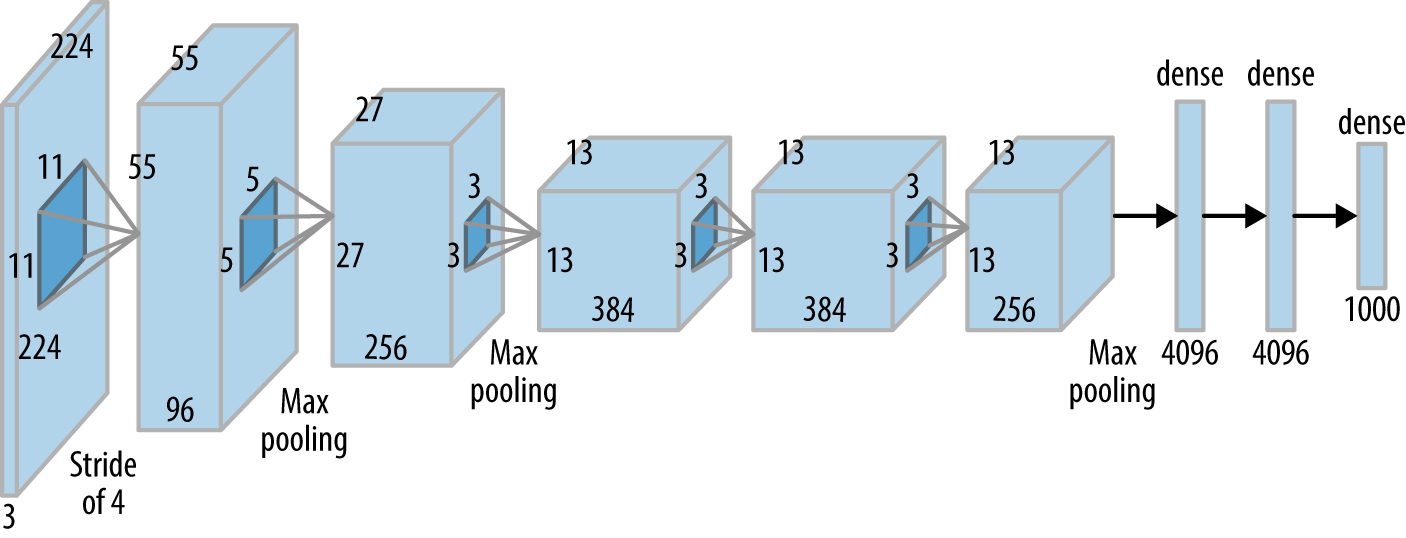

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os
import time

In [5]:
### INPUT
xin = Input(shape=(224,224,3))


### CONV PART
x = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu')(xin)
x = BatchNormalization()(x) 
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x)

x = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x) 
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x)

x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x) 

x = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x) 

x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x)


### FLATTENING
x = keras.layers.Flatten()(x)


### DENSE PART
x = Dense(units=4096, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(units=4096, activation='relu')(x)
x = Dropout(0.5)(x)

xout = Dense(units=10, activation='softmax')(x)


### MODEL
alexnet = Model(inputs=xin, outputs=xout)

In [6]:
alexNN.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_10 (Bat  (None, 54, 54, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_11 (Bat  (None, 26, 26, 256)      1024

$46,793,482$ parameters.

## VGG 16

https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.

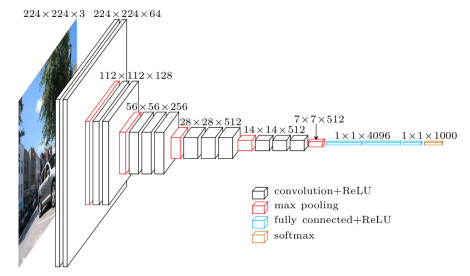

In [7]:
### INPUT
xin = Input(shape=(224,224,3))


### CONV PART
x = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(xin)
x = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)         

x = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x) 

x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x) 

x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x) 


### FLATTENING
x = Flatten()(x)


### DENSE PART
x = Dense(units=4096,activation="relu")(x)
x = Dense(units=4096,activation="relu")(x)

xout = Dense(units=10, activation="softmax")(x)


### MODEL
vgg16 = Model(inputs=xin, outputs=xout)

In [8]:
vgg16.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     147584    
                                                           

$134,301,514$ parameters.

## INCEPTION V1 (GoogLeNet)

https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202

https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/

Paper https://arxiv.org/pdf/1409.4842v1.pdf

The Inception network was an important milestone in the development of CNN classifiers. Before it, most popular CNNs just stacked convolution layers deeper and deeper, hoping to get better performance. The Inception network, on the other hand, grows the NN also in width, in order to decrease the depth.

**Inception module**

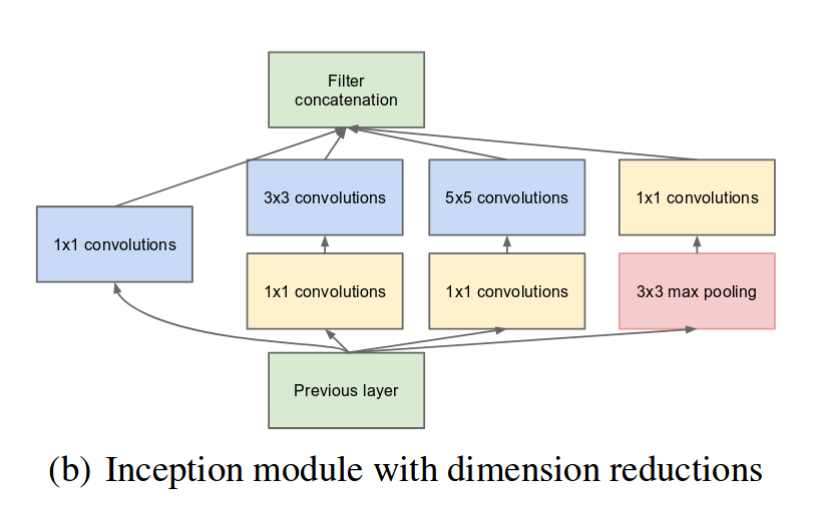

The Inception NN simply stuckes together several inception modules.

The idea behind the inception module is the following. We want to put in a certain point of our CNN a certain Conv layer. However, there are several things that we have to decide and fix in order to define the layer: kernel size, stride, padding, ... . And, also, I coudl decide to put more Conv layers in sequence, or just few layers, or just one layer. So, many many possibilites and combinations.

Which is the best path/configurations? Idea of the inception module: we don't know. We offer to the NN the possibility to have different paths. We offer to the NN the possibility to compute convolutions in different ways.

Going into the details, an inception module has the following structure. The input of the module is processed along 4 different paths, called towers.
1. First tower: only 1x1 convolution. 
2. Second tower: 1x1 conv + 3x3 conv.
3. Third tower: 1x1 conv + 5x5 conv.
4. Fourth tower: MaxPool + 1x1 conv.

Each tower produces a certain output. The outputs of the different towers have same spatial dimensions.
1. Output first tower: $w, h, c_1$. 
2. Output second tower: $w, h, c_2$. 
3. Output third tower: $w, h, c_3$. 
4. Output fourth tower: $w, h, c_4$. 

Finally, the outputs of the different towers are concatenated along the channels dimensions, producing a single output with dimensions: $w, h, (c_1+c_2+c_3+c_4)$. Basically, the channels are simply stacked together.

Let's implement it in Keras.

In [10]:
from tensorflow.keras.layers import concatenate

def inception_module(xin, c1, c2_int, c2, c3_int, c3, c4):
    """
    Arguments
    ---------
    xin: Tensor
        Input of the module
    c1: int
        Number of output channels of the tower 1
    c2_int: int
        Number of output channels of the first convolution in the tower 2 
        (Intermediate number of channels of the tower 2)
    c2: int
        Number of output channels of the tower 2
    c3: int
        Number of output channels of the tower 3
    c3_int: int
        Number of output channels of the first convolution in the tower 3 
        (Intermediate number of channels of the tower 3)
    c4: int
        Number of output channels of the tower 4
    """
    
    # Tower 1
    tower1 = Conv2D(filters=c1, kernel_size=(1,1), padding='same', activation='relu')(xin)
    
    # Tower 2
    tower2 = Conv2D(filters=c2_int, kernel_size=(1,1), padding='same', activation='relu')(xin)
    tower2 = Conv2D(filters=c2, kernel_size=(3,3), padding='same', activation='relu')(tower2)
    
    # Tower 3
    tower3 = Conv2D(filters=c3_int, kernel_size=(1,1), padding='same', activation='relu')(xin)
    tower3 = Conv2D(filters=c3, kernel_size=(5,5), padding='same', activation='relu')(tower3)
    
    # Tower 4
    tower4 = MaxPool2D(pool_size=(3,3), strides=(1,1), padding='same')(xin)
    tower4 = Conv2D(c4, (1,1), padding='same', activation='relu')(tower4)
    
    out = concatenate([tower1, tower2, tower3, tower4], axis=-1)
    return out

**Inception NN**

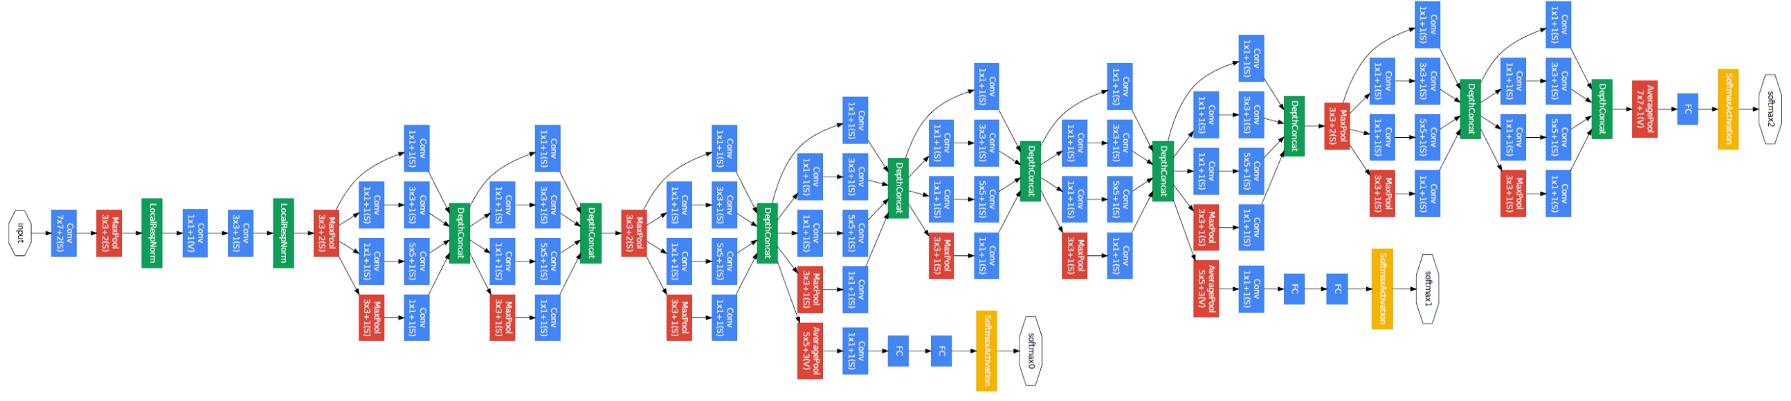

![alt-text](InceptionV1.png)

It consists in:
- Some normal Conv layers, with some MaxPool layers
- $9$ inception modules, with some MaxPool layers
- Average Pooling for flattening 
- Dense layer with softmax

In [4]:
from tensorflow.keras.layers import AveragePooling2D

In [12]:
### INPUT
xin = Input(shape=(224,224,3))


### CONV PART
x = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same')(xin)
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x) 

x = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same')(xin)
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x) 

x = inception_module(x, c1=64, c2_int=96, c2=128, c3_int=16, c3=32, c4=32)

x = inception_module(x, c1=128, c2_int=128, c2=192, c3_int=32, c3=96, c4=64)
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x) 

x = inception_module(x, c1=192, c2_int=96, c2=208, c3_int=16, c3=48, c4=64)      

x = inception_module(x, c1=160, c2_int=112, c2=224, c3_int=24, c3=64, c4=64)  

x = inception_module(x, c1=128, c2_int=128, c2=256, c3_int=24, c3=64, c4=64)  

x = inception_module(x, c1=112, c2_int=144, c2=288, c3_int=32, c3=64, c4=64)       

x = inception_module(x, c1=256, c2_int=160, c2=320, c3_int=32, c3=128, c4=128)
x = MaxPool2D(pool_size=(3,3), strides=(2,2))(x)

x = inception_module(x, c1=256, c2_int=160, c2=320, c3_int=32, c3=128, c4=128) 
x = inception_module(x, c1=384, c2_int=192, c2=384, c3_int=48, c3=128, c4=128)  


### FLATTENING
x = AveragePooling2D(pool_size=(7,7), strides=1)(x)
x = Dropout(0.4)(x)


### DENSE PART
xout = Dense(units=10, activation='softmax')(x)


### MODEL
inceptionV1 = Model(inputs=xin, outputs=xout)

In [13]:
inceptionV1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_73 (Conv2D)             (None, 224, 224, 19  5376        ['input_5[0][0]']                
                                2)                                                                
                                                                                                  
 max_pooling2d_19 (MaxPooling2D  (None, 111, 111, 19  0          ['conv2d_73[0][0]']              
 )                              2)                                                          

                                                                  'conv2d_88[0][0]',              
                                                                  'conv2d_90[0][0]',              
                                                                  'conv2d_91[0][0]']              
                                                                                                  
 conv2d_93 (Conv2D)             (None, 55, 55, 112)  57456       ['concatenate_11[0][0]']         
                                                                                                  
 conv2d_95 (Conv2D)             (None, 55, 55, 24)   12312       ['concatenate_11[0][0]']         
                                                                                                  
 max_pooling2d_24 (MaxPooling2D  (None, 55, 55, 512)  0          ['concatenate_11[0][0]']         
 )                                                                                                
          

                                                                                                  
 max_pooling2d_28 (MaxPooling2D  (None, 27, 27, 832)  0          ['concatenate_15[0][0]']         
 )                                                                                                
                                                                                                  
 conv2d_117 (Conv2D)            (None, 27, 27, 160)  133280      ['max_pooling2d_28[0][0]']       
                                                                                                  
 conv2d_119 (Conv2D)            (None, 27, 27, 32)   26656       ['max_pooling2d_28[0][0]']       
                                                                                                  
 max_pooling2d_29 (MaxPooling2D  (None, 27, 27, 832)  0          ['max_pooling2d_28[0][0]']       
 )                                                                                                
          

$5,864,762$ parameters.

## RESNET

https://towardsdatascience.com/building-a-resnet-in-keras-e8f1322a49ba

**Residual block**

In [19]:
from tensorflow.keras.layers import ReLU, Add

In [20]:
def residual_block(x, downsample, filters, kernel_size=3):
    y = Conv2D(filters=filters, kernel_size=kernel_size, strides= (1 if not downsample else 2), padding="same")(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    y = Conv2D(filters=filters, kernel_size=kernel_size, strides=1, padding="same")(y)

    if downsample:
        x = Conv2D(filters=filters, kernel_size=1, strides=2, padding="same")(x)
        
    out = Add()([x, y])
    out = BatchNormalization()(out)
    out = ReLU()(out)
    
    return out

**ResNet**

In [23]:
xin = Input(shape=(224, 224, 3))
num_filters = 64

x = BatchNormalization()(xin)
x = Conv2D(filters=num_filters, kernel_size=3, strides=1,padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)

num_resBlocks_list = [2, 5, 5, 2]
for i in range(len(num_resBlocks_list)):
    num_resBlocks = num_resBlocks_list[i]
    for j in range(num_resBlocks):
        x = residual_block(x, downsample=(j==0 and i!=0), filters=num_filters)
    num_filters *= 2

x = AveragePooling2D(4)(x)
x = Flatten()(x)
xout = Dense(10, activation='softmax')(x)

resnet = Model(xin, xout)

In [24]:
resnet.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization_65 (BatchN  (None, 224, 224, 3)  12         ['input_10[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 conv2d_197 (Conv2D)            (None, 224, 224, 64  1792        ['batch_normalization_65[0][0]'] 
                                )                                                           

                                                                                                  
 conv2d_205 (Conv2D)            (None, 112, 112, 12  147584      ['re_lu_67[0][0]']               
                                8)                                                                
                                                                                                  
 batch_normalization_73 (BatchN  (None, 112, 112, 12  512        ['conv2d_205[0][0]']             
 ormalization)                  8)                                                                
                                                                                                  
 re_lu_68 (ReLU)                (None, 112, 112, 12  0           ['batch_normalization_73[0][0]'] 
                                8)                                                                
                                                                                                  
 conv2d_20

                                8)                                                                
                                                                                                  
 conv2d_213 (Conv2D)            (None, 56, 56, 256)  295168      ['re_lu_75[0][0]']               
                                                                                                  
 batch_normalization_81 (BatchN  (None, 56, 56, 256)  1024       ['conv2d_213[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 re_lu_76 (ReLU)                (None, 56, 56, 256)  0           ['batch_normalization_81[0][0]'] 
                                                                                                  
 conv2d_215 (Conv2D)            (None, 56, 56, 256)  33024       ['re_lu_75[0][0]']               
          

                                                                                                  
 batch_normalization_90 (BatchN  (None, 56, 56, 256)  1024       ['add_39[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 re_lu_85 (ReLU)                (None, 56, 56, 256)  0           ['batch_normalization_90[0][0]'] 
                                                                                                  
 conv2d_224 (Conv2D)            (None, 28, 28, 512)  1180160     ['re_lu_85[0][0]']               
                                                                                                  
 batch_normalization_91 (BatchN  (None, 28, 28, 512)  2048       ['conv2d_224[0][0]']             
 ormalization)                                                                                    
          

$15,853,328$ parameters.